## Preliminary analysis

This notebook analyzes the MTA subway data for the week of June 10-17, 2017 that can be found here:

http://web.mta.info/developers/turnstile.html

1.Download that SAME file and read it in below. View the first few rows.

In [201]:
import pandas as pd 
mta = pd.read_csv('Subway Dataset.txt')
mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/10/2017,00:00:00,REGULAR,6215258,2104297
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/10/2017,04:00:00,REGULAR,6215284,2104303
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/10/2017,08:00:00,REGULAR,6215318,2104337
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/10/2017,12:00:00,REGULAR,6215475,2104417
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/10/2017,16:00:00,REGULAR,6215841,2104465


2.What are the column names?

In [202]:
print(mta.columns)

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')


3.We can see that there is a lot of whitespace at the end of the exits column name. Let's strip that whitespace:

In [203]:
mta.columns = mta.columns.str.strip()
print(mta.columns)

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')


4.How big is the data set?

In [204]:
print(mta.shape)

(197209, 11)


5.How many unique stations are there? What are they? Answer each of these questions in one line each.

In [205]:
print(len(mta.groupby('STATION')))
mta.groupby('STATION').sum()

376


,ENTRIES,EXITS
STATION,,
1 AV,58586439499,60761722844
103 ST,6159546302,25497370998
103 ST-CORONA,2961250139,2761521588
104 ST,203476432319,147939061941
110 ST,1307707035,1284447484
111 ST,6665357833,3314314817
116 ST,72001108475,87046842590
116 ST-COLUMBIA,51079934270,10887681396
121 ST,342679611,271293506


6.Okay, so we understand what station represents. But what the heck are C/A, UNIT, and SCP? Keep in mind that in the larger stations, you might have multiple areas within one station that look like this:

<img src="image.jpg" style="width: 300px;"/>

Further complicating things, there are a few station names like 14TH ST that refer to more than one station location along that street.

This data set is not very well documented. Welcome to the joys of real world data science!!!

Read the following two links carefully to see other people's confusion and what information they have been able to gather:

https://groups.google.com/forum/#!topic/mtadeveloperresources/AMVx2WUY9iI

https://groups.google.com/forum/#!searchin/mtadeveloperresources/%22remote$20unit%22%7Csort:relevance/mtadeveloperresources/z8l3ZU9cY6Y/OFlHGkFAimQJ

It sounds like each C/A + UNIT + SCP + STATION combo refers to a single turnstile. How many unique turnstiles are there? 

In [206]:
print(len(mta.groupby(['C/A','UNIT','SCP','STATION'])))

4695


7.What data types are each of the columns?

In [207]:
mta.dtypes

C/A         object
UNIT        object
SCP         object
STATION     object
LINENAME    object
DIVISION    object
DATE        object
TIME        object
DESC        object
ENTRIES      int64
EXITS        int64
dtype: object

8.We can see that the exits and entries are treated as integers but the others are all treated as objects (strings). Overwrite the time column so that it is a datetime object containing the combined date and time column info (so that the times have a chronological order). 

In [208]:
import datetime

mta.TIME = pd.to_timedelta(mta['TIME'])
mta.DATE = pd.to_datetime(mta['DATE'], format = '%m/%d/%Y')
mta['TIME'] =  mta.TIME + mta['DATE']
mta.TIME

0        2017-06-10 00:00:00
1        2017-06-10 04:00:00
2        2017-06-10 08:00:00
3        2017-06-10 12:00:00
4        2017-06-10 16:00:00
5        2017-06-10 20:00:00
6        2017-06-11 00:00:00
7        2017-06-11 04:00:00
8        2017-06-11 08:00:00
9        2017-06-11 12:00:00
10       2017-06-11 16:00:00
11       2017-06-11 20:00:00
12       2017-06-12 00:00:00
13       2017-06-12 04:00:00
14       2017-06-12 08:00:00
15       2017-06-12 12:00:00
16       2017-06-12 16:00:00
17       2017-06-12 20:00:00
18       2017-06-13 00:00:00
19       2017-06-13 04:00:00
20       2017-06-13 08:00:00
21       2017-06-13 12:00:00
22       2017-06-13 16:00:00
23       2017-06-13 20:00:00
24       2017-06-14 00:00:00
25       2017-06-14 04:00:00
26       2017-06-14 08:00:00
27       2017-06-14 12:00:00
28       2017-06-14 16:00:00
29       2017-06-14 20:00:00
                 ...        
197179   2017-06-12 01:00:00
197180   2017-06-12 05:00:00
197181   2017-06-12 09:00:00
197182   2017-

9.What is the earliest and latest date in our dataset?

In [209]:
from datetime import datetime
print(min(mta.TIME))
print(max(mta.TIME))

2017-06-10 00:00:00
2017-06-16 23:59:54


10.If we wanted to only look at the 34st Street Penn Station stop on 6/12/2017, what would we type?

In [210]:
mta[(mta['STATION'] == '34 ST-PENN STA') & (mta['DATE'] == '2017-06-12')]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
49612,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,2017-06-12,2017-06-12 00:00:00,REGULAR,1829493,1553798
49613,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,2017-06-12,2017-06-12 04:00:00,REGULAR,1829495,1553801
49614,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,2017-06-12,2017-06-12 08:00:00,REGULAR,1829676,1553947
49615,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,2017-06-12,2017-06-12 12:00:00,REGULAR,1829944,1554414
49616,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,2017-06-12,2017-06-12 16:00:00,REGULAR,1829981,1554571
49617,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,2017-06-12,2017-06-12 20:00:00,REGULAR,1830036,1555166
49654,N067,R012,00-00-01,34 ST-PENN STA,ACE,IND,2017-06-12,2017-06-12 00:00:00,REGULAR,1746585,1974948
49655,N067,R012,00-00-01,34 ST-PENN STA,ACE,IND,2017-06-12,2017-06-12 04:00:00,REGULAR,1746585,1974948
49656,N067,R012,00-00-01,34 ST-PENN STA,ACE,IND,2017-06-12,2017-06-12 08:00:00,REGULAR,1746743,1974978
49657,N067,R012,00-00-01,34 ST-PENN STA,ACE,IND,2017-06-12,2017-06-12 12:00:00,REGULAR,1747115,1975121


11.Create a dictionary called bigDict. It should contain a nested set of keys and values. The outermost key should be the tuple (C/A,UNIT,STATION) and its value should itself be a dictionary with the SCP as the key and a list of (TIME, EXITS) tuples as its values. The purpose of this section is to prepare data for later uses. It should take a little while to finish running.

In [211]:
bigDict = {}

for _,row in mta.iterrows():
    key = (row["C/A"],row["UNIT"],row["STATION"])
    sub_key = row["SCP"]
    if key in bigDict:
        if sub_key in bigDict[key]:
            bigDict[key][sub_key].append((row["TIME"],row["EXITS"]))
        else:
            bigDict[key][sub_key] = [(row["TIME"],row["EXITS"])]
    else:
        bigDict[key] = {sub_key:[(row["TIME"],row["EXITS"])]}

12.As an example, use the bigDict to view all of the turnstile data located at the('A037', 'R170', '14 ST-UNION SQ') area:

In [212]:
bigDict[('A037', 'R170', '14 ST-UNION SQ')]


{'05-00-00': [(Timestamp('2017-06-10 01:00:00'), 30866),
  (Timestamp('2017-06-10 05:00:00'), 30892),
  (Timestamp('2017-06-10 09:00:00'), 31064),
  (Timestamp('2017-06-10 13:00:00'), 31714),
  (Timestamp('2017-06-10 17:00:00'), 32323),
  (Timestamp('2017-06-10 21:00:00'), 32825),
  (Timestamp('2017-06-11 01:00:00'), 33068),
  (Timestamp('2017-06-11 05:00:00'), 33115),
  (Timestamp('2017-06-11 09:00:00'), 33214),
  (Timestamp('2017-06-11 13:00:00'), 33649),
  (Timestamp('2017-06-11 17:00:00'), 34137),
  (Timestamp('2017-06-11 21:00:00'), 34527),
  (Timestamp('2017-06-12 01:00:00'), 34667),
  (Timestamp('2017-06-12 05:00:00'), 34684),
  (Timestamp('2017-06-12 09:00:00'), 35349),
  (Timestamp('2017-06-12 13:00:00'), 36274),
  (Timestamp('2017-06-12 17:00:00'), 36710),
  (Timestamp('2017-06-12 21:00:00'), 36993),
  (Timestamp('2017-06-13 01:00:00'), 37093),
  (Timestamp('2017-06-13 05:00:00'), 37105),
  (Timestamp('2017-06-13 09:00:00'), 37870),
  (Timestamp('2017-06-13 13:00:00'), 38835)

13.Create a function called inspection that takes in the (C/A,UNIT,STATION) tuple and SCP value and plots the exit counter data versus time. 

For example, the input of 
```python
inspection(('A037', 'R170', '14 ST-UNION SQ'), '05-00-00')
```
should produce an upward trending plot.

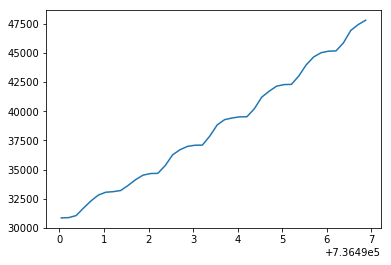

In [213]:
import matplotlib.pyplot as plt
import matplotlib 

def inspection(key, sub_key):
    x = []
    y = []
    for tup in bigDict[key][sub_key]:
        x.append(tup[0])
        y.append(tup[1])
    x = matplotlib.dates.date2num(x)
    plt.plot(x,y)
    plt.show();
    
inspection(('A037', 'R170', '14 ST-UNION SQ'), '05-00-00')


## Finding Data Errors
14.Due to bugs in MTA data, we will need to remove "incorrect" data. First, find the incorrect data by figuring out which turnstile counters aren't going strictly upwards. How many of these incorrect data values are there? Create a smaller dictionary callled "trouble" that contains the troublesome data from the bigDict.

In [214]:
trouble = dict()
for key in bigDict:
    for sub_key in bigDict[key]:
        num = bigDict[key][sub_key][0][1]
        for val in bigDict[key][sub_key]:
            if val[1] < num:
                if key in trouble:
                    if sub_key in trouble[key]:
                        trouble[key][sub_key].append(val)
                    else:
                        trouble[key][sub_key] = [val]           
                else:
                    trouble[key] = {sub_key: [val]}    
trouble

{('A011',
  'R080',
  '57 ST-7 AV'): {'01-00-00': [(Timestamp('2017-06-10 04:00:00'), 492547993),
   (Timestamp('2017-06-10 08:00:00'), 492547731),
   (Timestamp('2017-06-10 12:00:00'), 492547071),
   (Timestamp('2017-06-10 16:00:00'), 492546458),
   (Timestamp('2017-06-10 20:00:00'), 492545865),
   (Timestamp('2017-06-11 00:00:00'), 492545621),
   (Timestamp('2017-06-11 04:00:00'), 492545572),
   (Timestamp('2017-06-11 08:00:00'), 492545434),
   (Timestamp('2017-06-11 12:00:00'), 492544945),
   (Timestamp('2017-06-11 16:00:00'), 492544307),
   (Timestamp('2017-06-11 20:00:00'), 492543872),
   (Timestamp('2017-06-12 00:00:00'), 492543686),
   (Timestamp('2017-06-12 04:00:00'), 492543669),
   (Timestamp('2017-06-12 08:00:00'), 492543224),
   (Timestamp('2017-06-12 12:00:00'), 492541625),
   (Timestamp('2017-06-12 16:00:00'), 492541005),
   (Timestamp('2017-06-12 20:00:00'), 492540426),
   (Timestamp('2017-06-13 00:00:00'), 492540243),
   (Timestamp('2017-06-13 04:00:00'), 492540224),
  

15.Using the troublesome dictionary and your inspection plotting function, plot all of the troublesome data. There are several different types of errors. What do you think is causing each type?

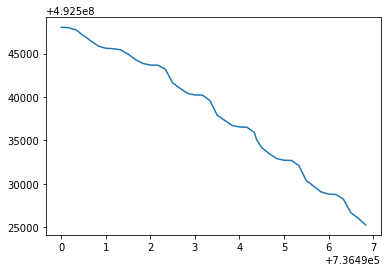

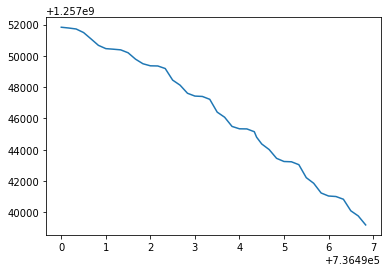

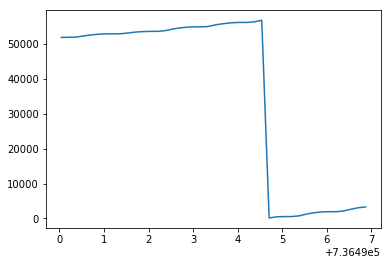

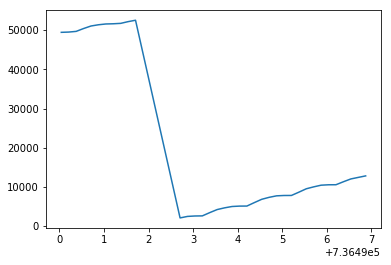

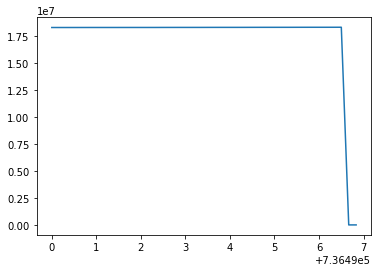

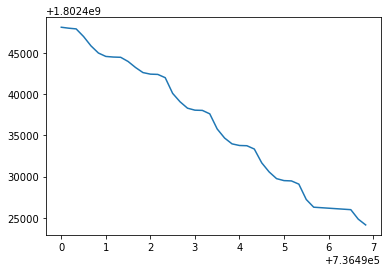

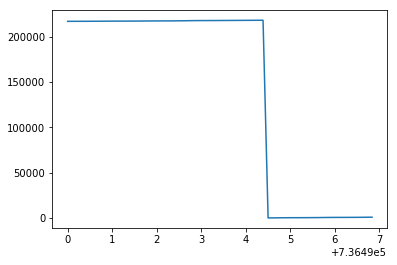

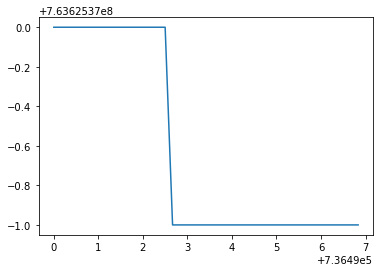

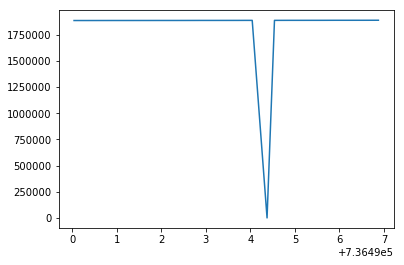

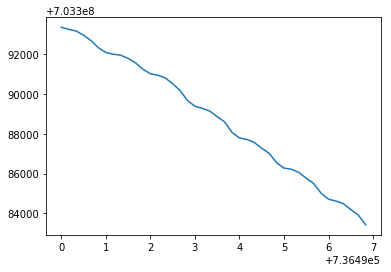

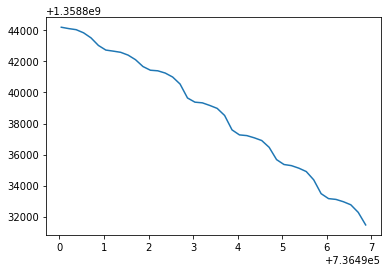

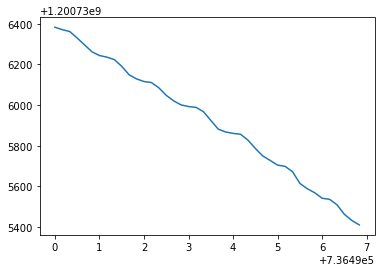

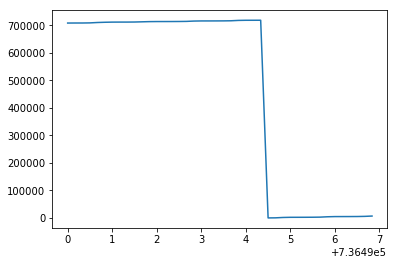

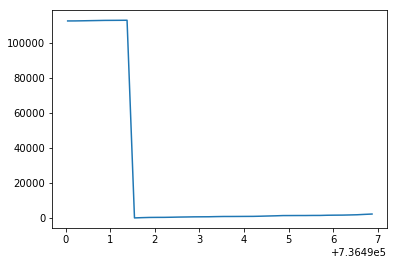

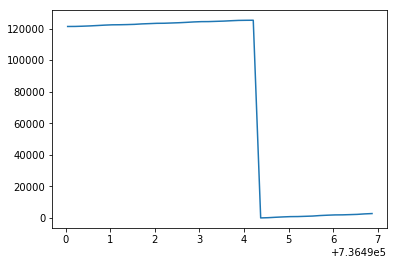

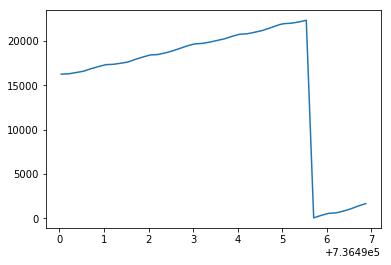

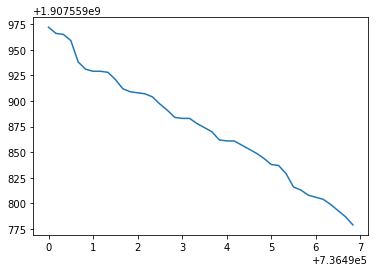

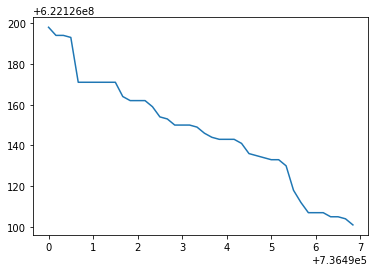

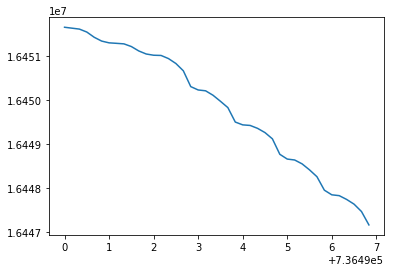

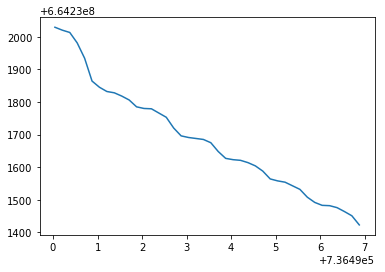

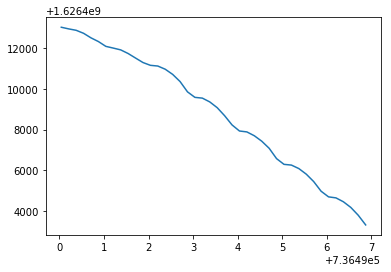

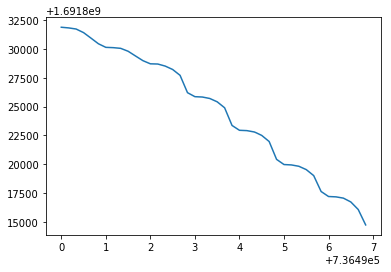

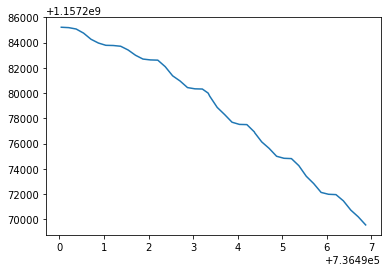

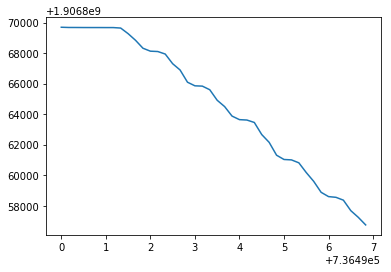

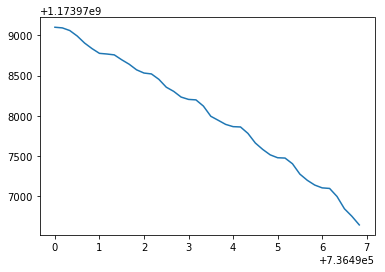

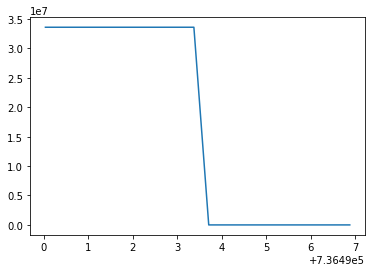

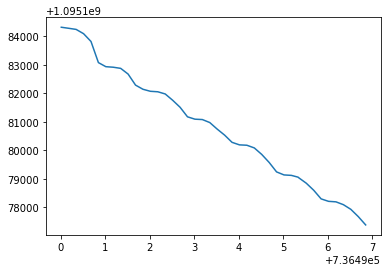

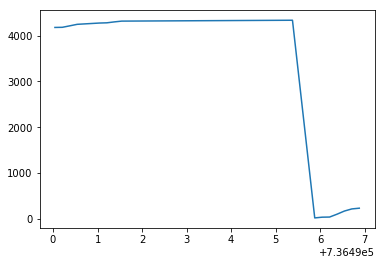

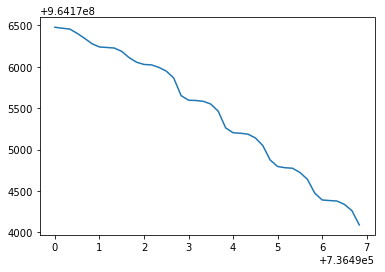

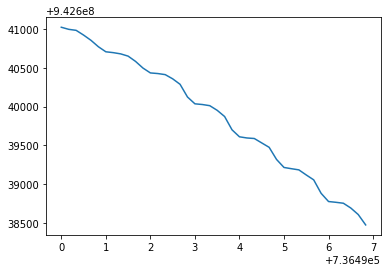

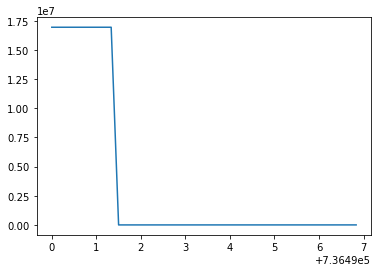

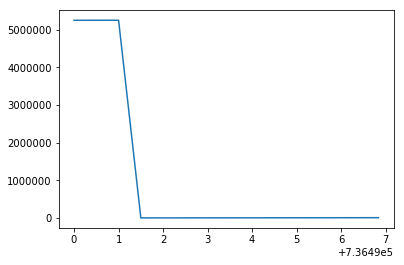

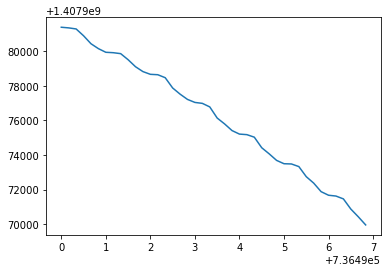

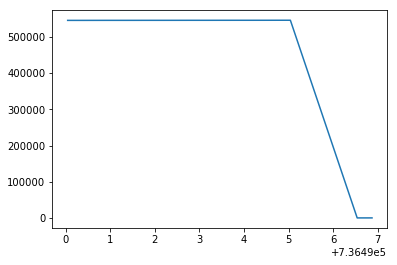

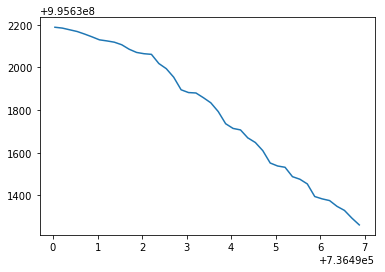

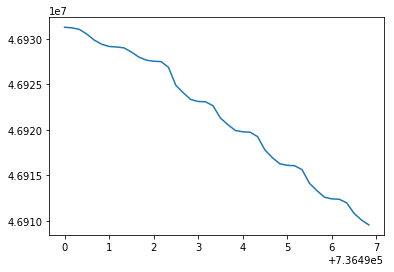

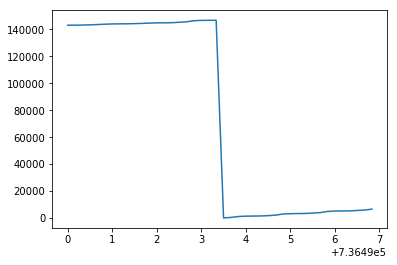

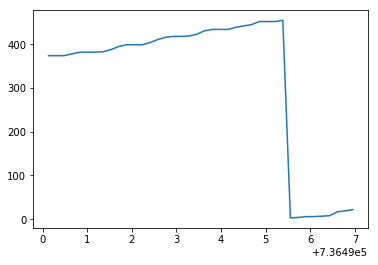

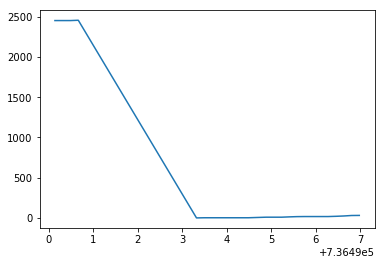

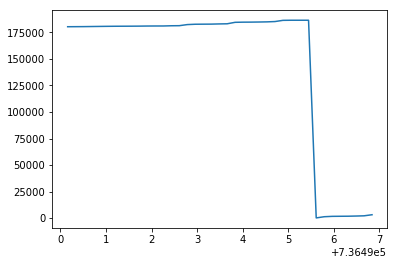

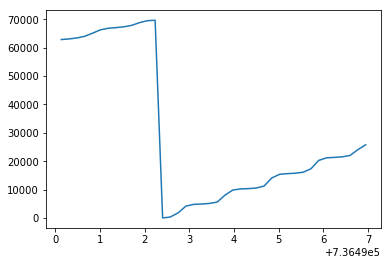

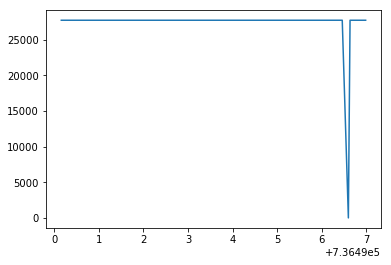

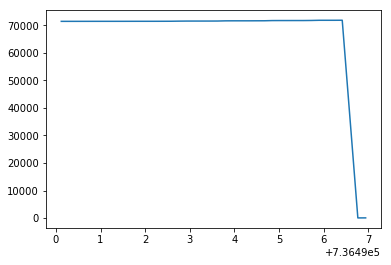

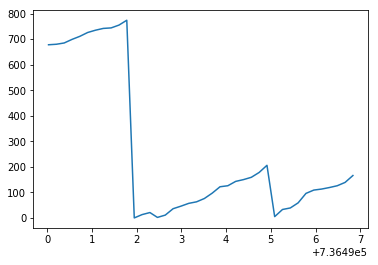

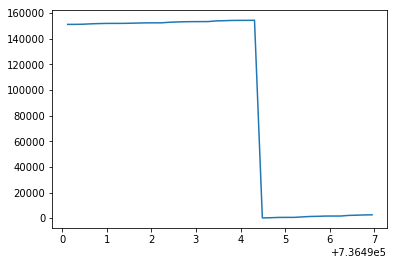

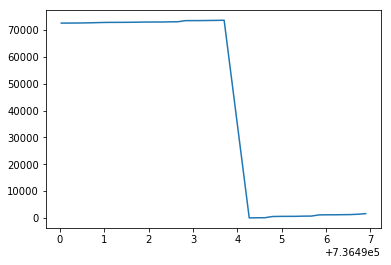

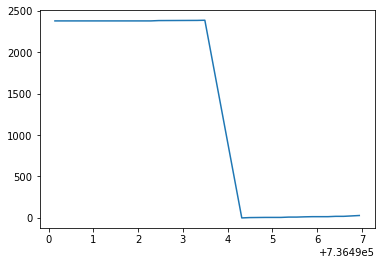

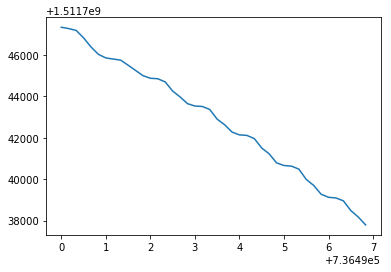

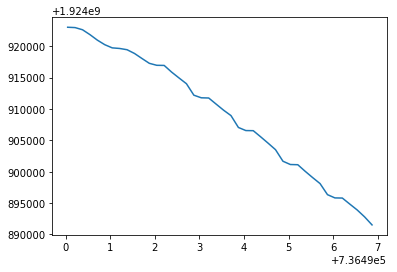

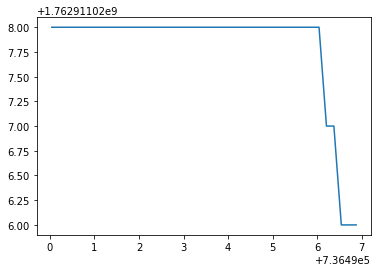

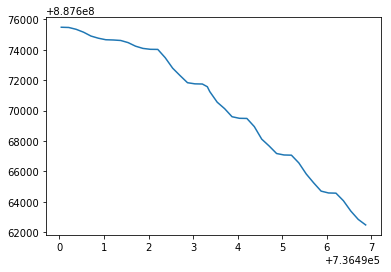

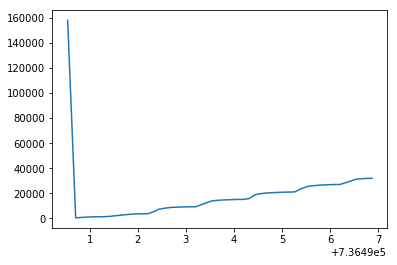

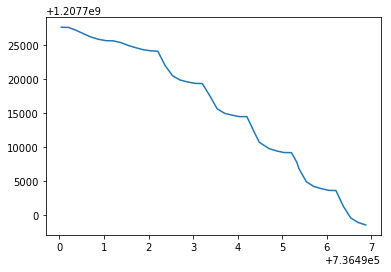

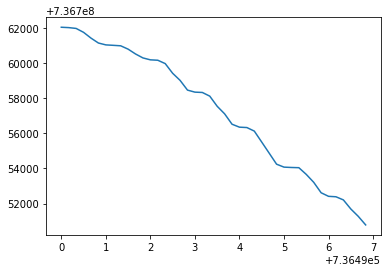

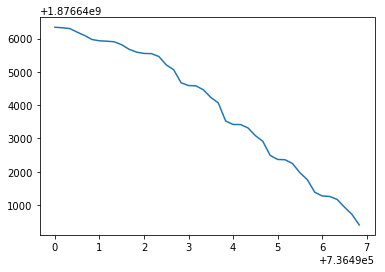

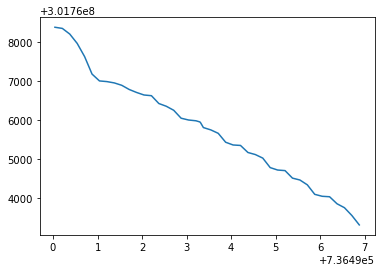

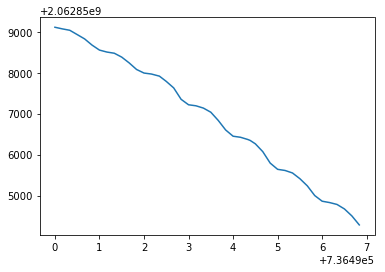

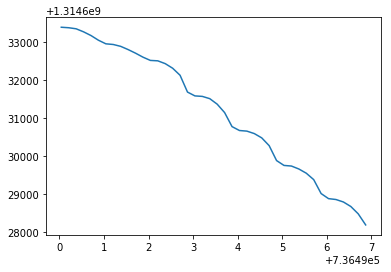

In [215]:
for key in trouble:
    for sub_key in trouble[key]:
        inspection(key, sub_key)

## Data Cleanup
There are three types of mistakes: decreasing, garbage values, and turnstile resets.

#### Mistake Type I: Monotone but Decreasing - To fix this, we reflect the data. 

16.Run the cell below to fix it:

In [216]:
def isMonotoneDecrease(tup):
    '''Input: Tuple of (Station,SCP). 
    Output: True if this SCP has monotone property, but decreasing, False otherwise.'''
    n = len(bigDict[tup[0]][tup[1]])
    for i in range(n-1):
        if(bigDict[tup[0]][tup[1]][i+1][1]>bigDict[tup[0]][tup[1]][i][1]):
            return False
    return True

def fixMonotoneDecrease(tup):
    '''reflects the data to fix it'''
    n = len(bigDict[tup[0]][tup[1]])
    for i in range(n):
        bigDict[tup[0]][tup[1]][i] = (bigDict[tup[0]][tup[1]][i][0],(-1)*bigDict[tup[0]][tup[1]][i][1])
    

monotoneDecreaseList = []

for k in trouble:
    for l in trouble[k]:
        print(k[2], l)
        
        
for k in trouble:
    for l in trouble[k]:
        if(isMonotoneDecrease((k[2], l))):
            monotoneDecreaseList.append(k)
            
print("Total Monotone Decrease:",len(monotoneDecreaseList))
for k in monotoneDecreaseList:
    fixMonotoneDecrease(k)
print("Problem Fixed!")

for k in trouble:
    if(isMonotoneDecrease(k)):
        monotoneDecreaseList.append(k)
print("Total Monotone Decrease:",len(monotoneDecreaseList))
for k in monotoneDecreaseList:
    inspection(k[0], k[1])

57 ST-7 AV 01-00-00
57 ST-7 AV 01-00-03
CANAL ST 00-06-00
WHITEHALL S-FRY 00-00-06
CHAMBERS ST 01-06-00
CHAMBERS ST 01-06-01
AVENUE H 00-05-00
KINGS HWY 00-05-01
AVENUE U 00-00-01
59 ST 00-00-02
18 AV 00-00-02
6 AV 01-00-02
BEDFORD AV 00-06-05
HOWARD BCH JFK 01-00-03
JFK JAMAICA CT1 00-03-00
JFK JAMAICA CT1 00-03-02
104 ST 00-00-01
104 ST 00-00-02
METROPOLITAN AV 00-00-01
163 ST-AMSTERDM 00-00-01
116 ST 01-00-02
42 ST-PORT AUTH 01-00-01
14 ST 01-03-00
HIGH ST 00-00-01
CLINTON-WASH AV 00-06-01
111 ST 01-06-01
161/YANKEE STAD 00-00-01
36 ST 01-06-01
GRAND-NEWTOWN 00-06-01
75 AV 00-06-02
47-50 STS ROCK 01-06-00
34 ST-HERALD SQ 00-05-02
GRAND ST 00-00-02
7 AV 00-00-01
AVENUE I 00-00-00
LEXINGTON AV/63 00-00-01
JAMAICA CENTER 00-00-05
NEWARK HW BMEBE 00-00-05
NEWARK HW BMEBE 00-00-07
NEWARK HW BMEBE 00-01-02
JOURNAL SQUARE 00-01-00
CITY / BUS 00-02-00
CITY / BUS 00-02-01
14TH STREET 00-00-03
14TH STREET 00-04-00
LACKAWANNA 01-00-03
NEWARK BM BW 01-02-03
14 ST 00-00-00
72 ST 01-06-02
FULTON 

KeyError: '57 ST-7 AV'

#### Mistake Type II: Garbage Value - To fix this, remove the garbage value

17.Run the cell below to fix it:

In [ ]:
def garbageEliminator(tup):
    '''removes nonsensical isolated points'''
    n = len(bigDict[tup[0]][tup[1]])
    toDel = []
    for i in range(1,n-1):
        if((bigDict[tup[0]][tup[1]][i-1][1]>bigDict[tup[0]][tup[1]][i+1][1])):
            continue
        if((bigDict[tup[0]][tup[1]][i-1][1]<=bigDict[tup[0]][tup[1]][i][1]) and (bigDict[tup[0]][tup[1]][i][1]<=bigDict[tup[0]][tup[1]][i+1][1])):
            continue
        toDel.append(bigDict[tup[0]][tup[1]][i])
    #Deletion Process
    if(len(toDel)==0):
        return 0
    for k in toDel:
        bigDict[tup[0]][tup[1]].remove(k)
    return 1


#Driver
cnt = 0
healList = []
for k in trouble:
    if(garbageEliminator(k)):
        healList.append(k)
print("Garbage Removed:",len(healList))
for k in healList:
    inspection(k[0], k[1])

#### Mistake Type III: Turnstile Reset - To fix this, shift the data upwards.

18.Run the cell below to fix it:

In [ ]:
def dealingWithReset(tup):
    '''for counters that are reset, we fix the data by shifting it upwards'''
    sta = tup[0]
    tsl = tup[1]
    n = len(bigDict[sta][tsl])
    #Detecting Part
    resetPoint = [] # it means (i,i+1) is reset
    resetSet = []
    for i in range(1,n-2):
        if(bigDict[sta][tsl][i][1]<=bigDict[sta][tsl][i+1][1]):
            continue #We don't need to change this one
        resetPoint.append(i)
    #Fixing Part
    resetSet = set(resetPoint)
    cumulative = 0
    for i in range(n-2):
        if(i not in resetSet):
            bigDict[sta][tsl][i] = (bigDict[sta][tsl][i][0],bigDict[sta][tsl][i][1]+cumulative)
            continue
        #Problem
        expected = (bigDict[sta][tsl][i][1]-bigDict[sta][tsl][i-1][1])+ (bigDict[sta][tsl][i+2][1]-bigDict[sta][tsl][i+1][1])
        expected = int(expected/2)
        shift = (bigDict[sta][tsl][i][1]+expected)-bigDict[sta][tsl][i+1][1]
        cumulative = shift
    for i in range(n-2,n):
        bigDict[sta][tsl][i] = (bigDict[sta][tsl][i][0],bigDict[sta][tsl][i][1]+cumulative)
    #Done!
    
#Test Usage
inspection(('JFK03', 'R536', 'JFK JAMAICA CT1'), '00-03-00')
dealingWithReset((('JFK03', 'R536', 'JFK JAMAICA CT1'), '00-03-00'))
print("Cleaned")
inspection(('JFK03', 'R536', 'JFK JAMAICA CT1'), '00-03-00')

## Overall Cleaning Process
19.This next cell does all of the previous cleanup in one cell. Run the cell below:

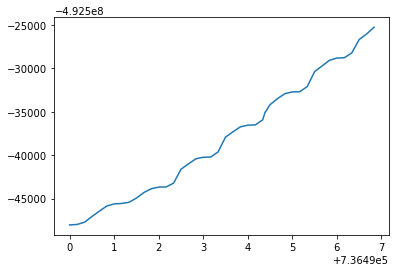

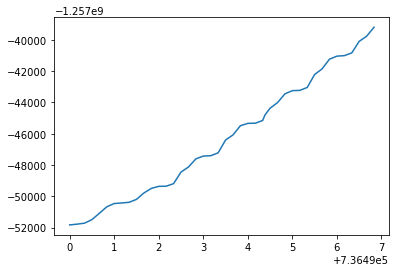

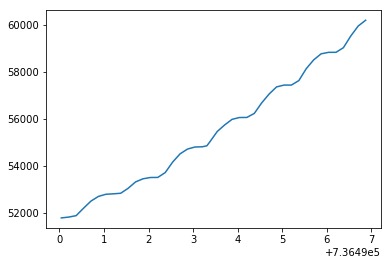

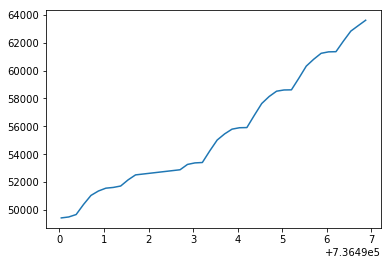

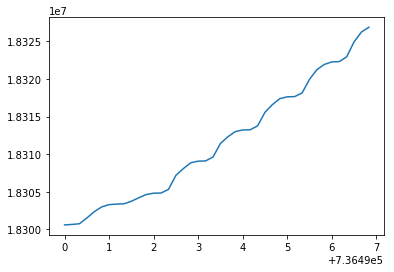

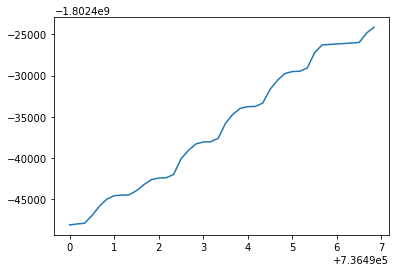

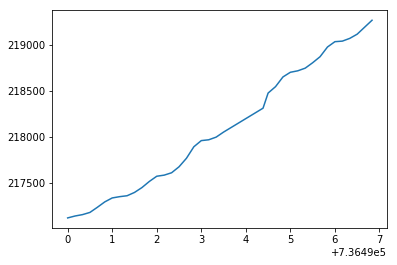

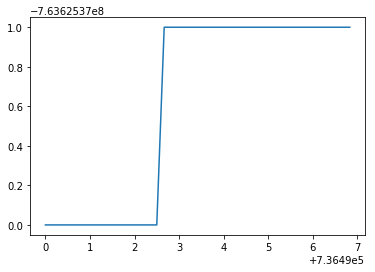

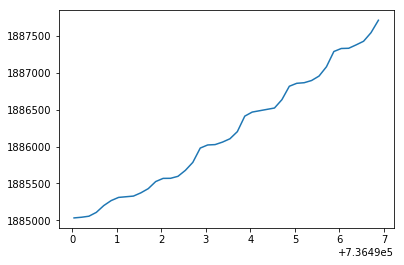

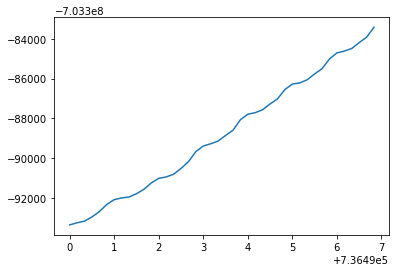

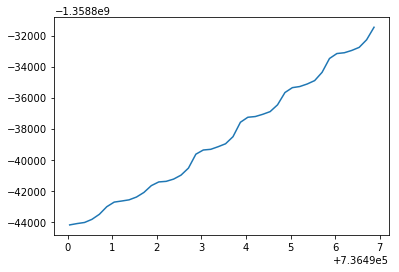

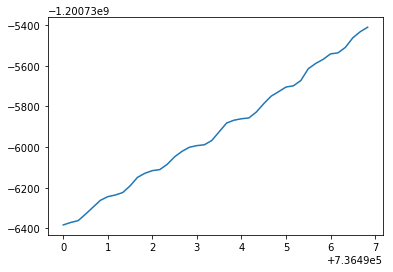

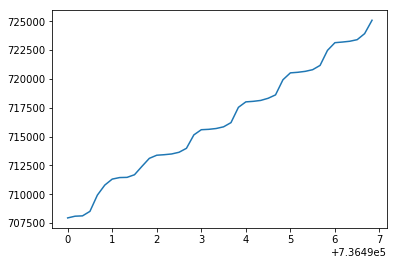

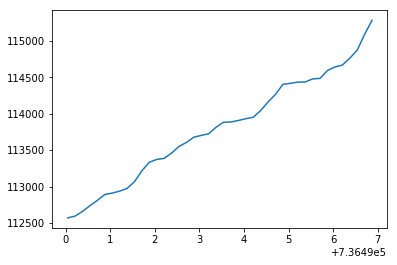

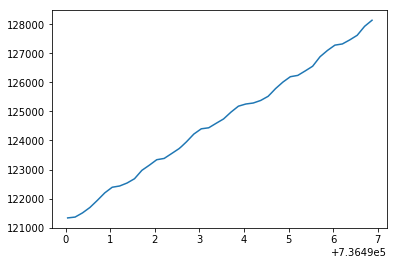

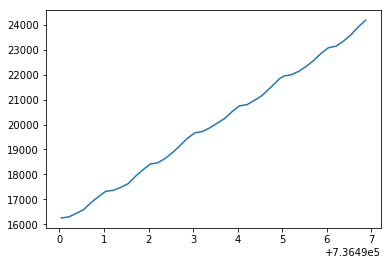

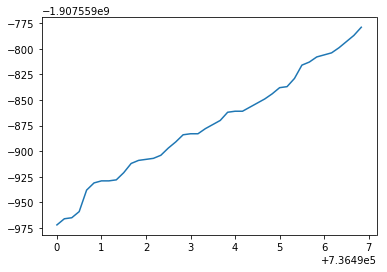

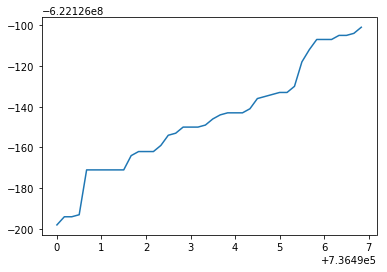

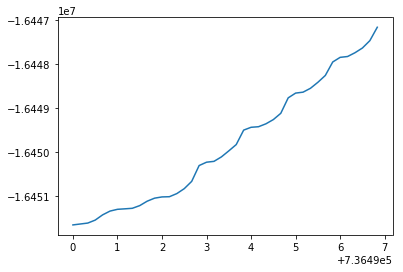

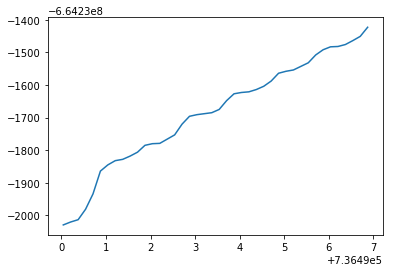

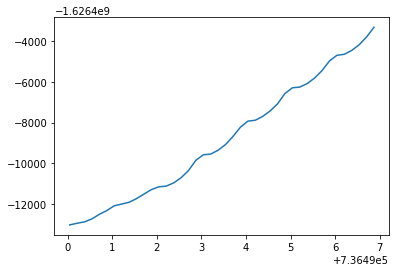

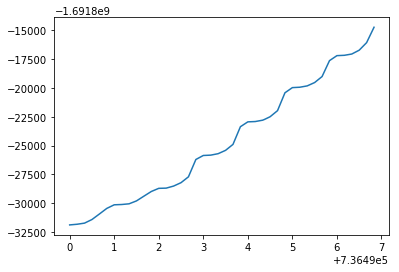

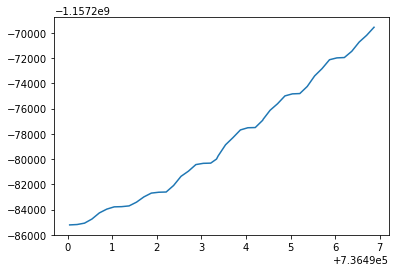

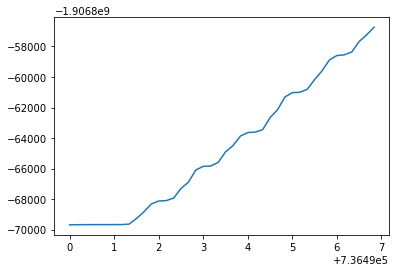

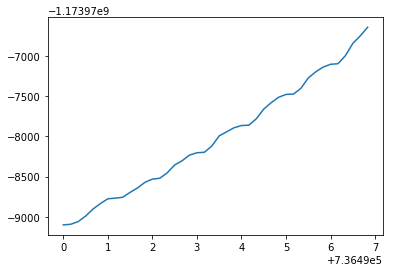

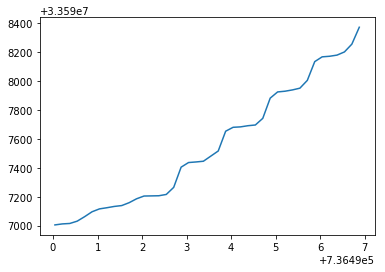

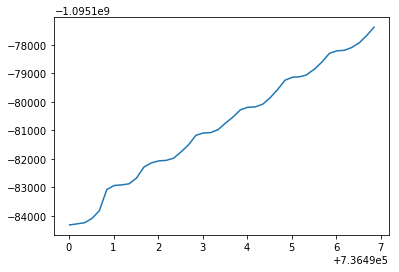

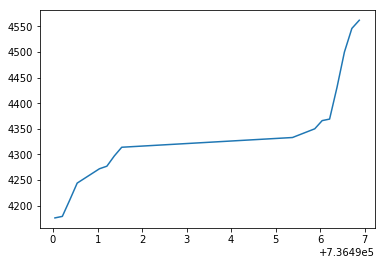

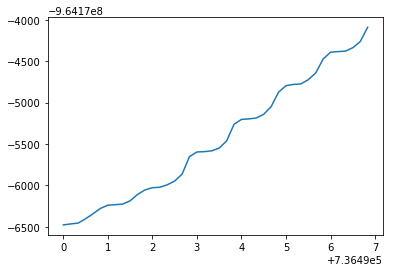

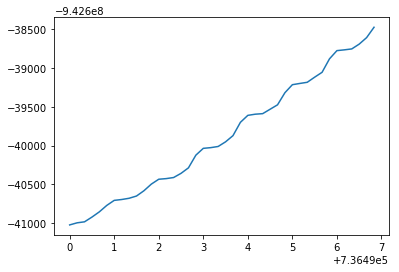

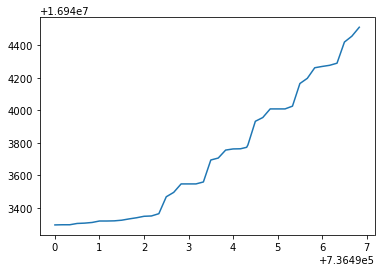

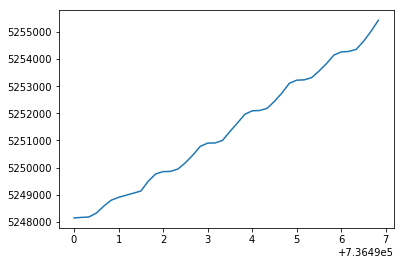

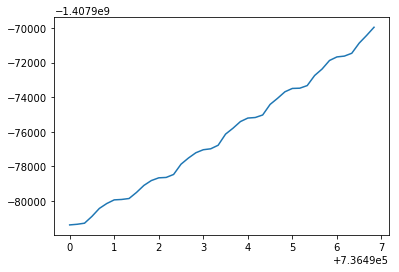

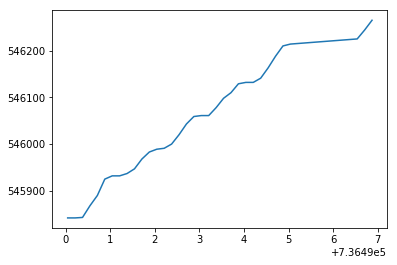

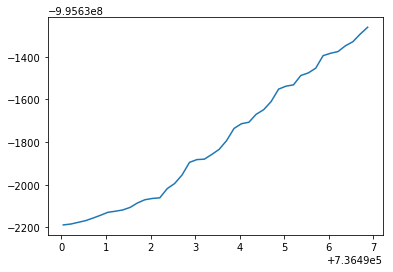

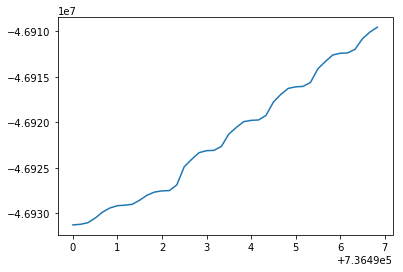

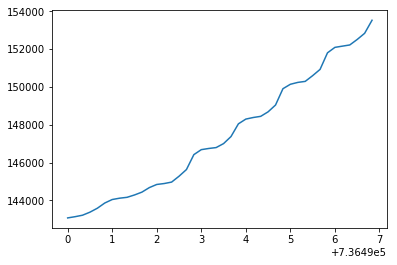

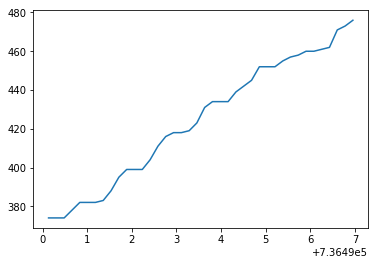

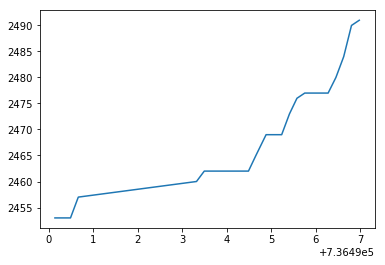

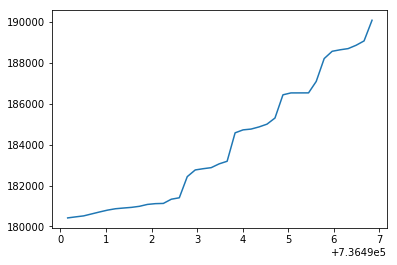

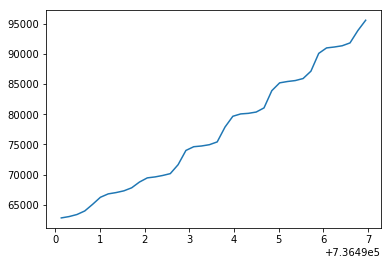

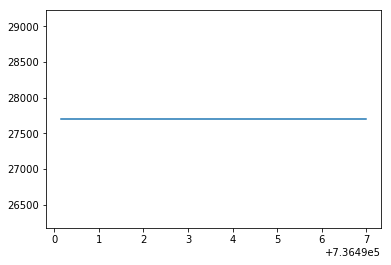

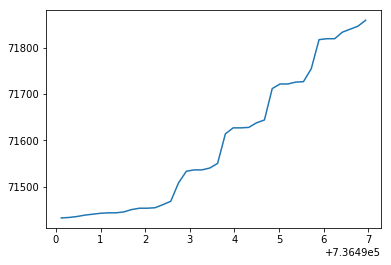

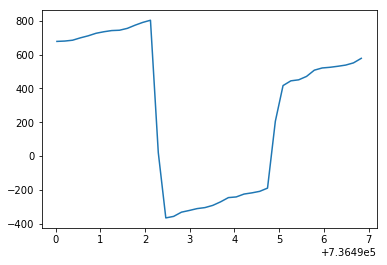

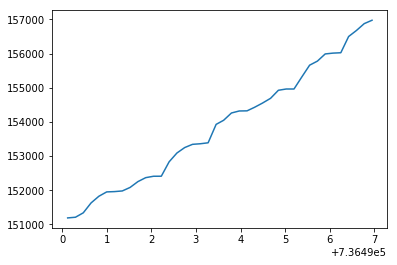

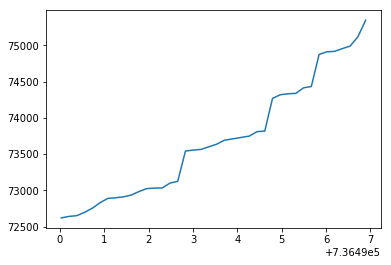

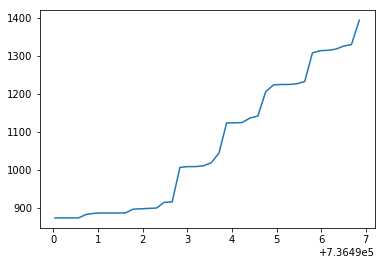

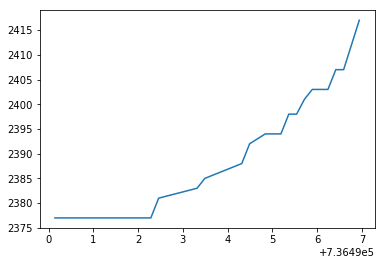

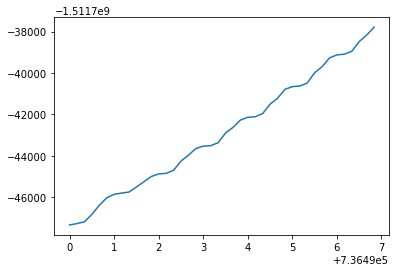

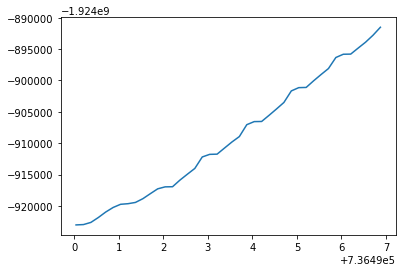

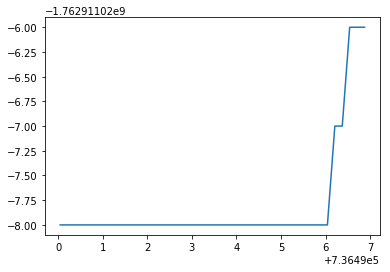

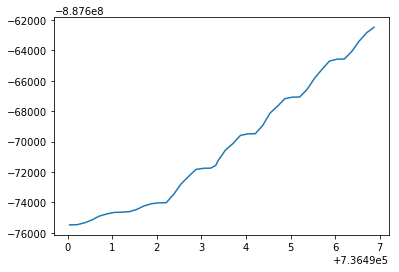

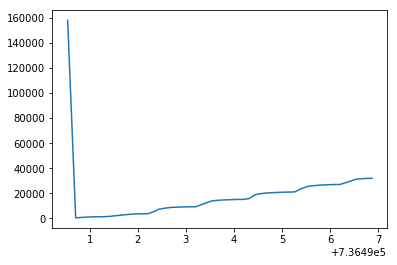

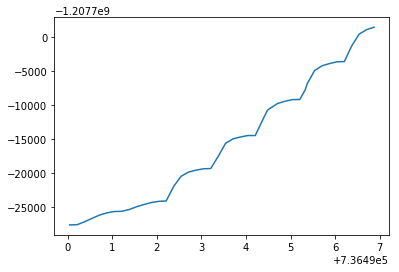

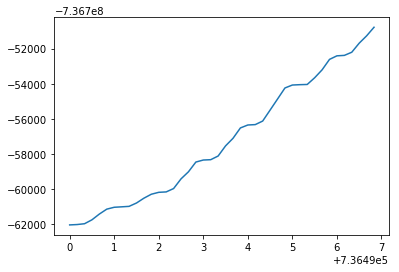

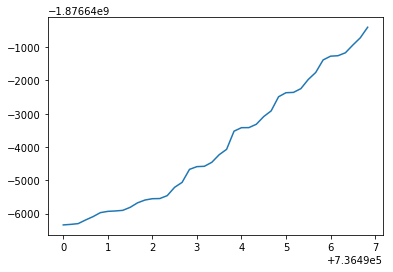

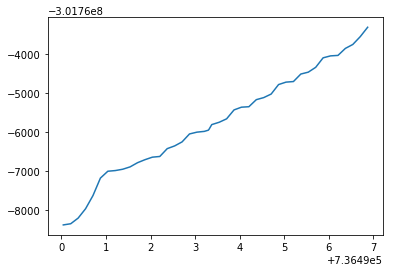

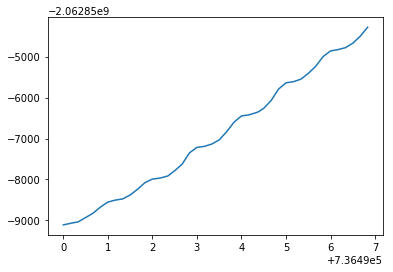

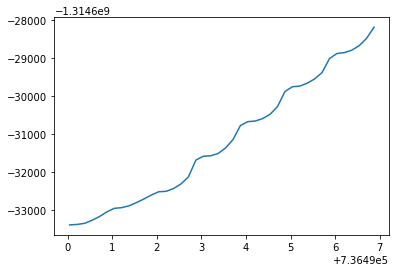

In [217]:
toClean = {}
for st,stv in bigDict.items():
    for scp,lst in stv.items():
        #Cleaning in Each LIST of turnstile
        toDel = []
        n = len(lst)
        lst.sort()
        for i in range(1,n-1):
            if(lst[i-1][1]<=lst[i][1] and lst[i][1]<=lst[i+1][1]): #What we expected Data to be (Non-Decreasing)
                continue

            key = (st,scp)
            toClean[key] = trouble.get(key,0)+1
            
for k in toClean.keys():
    if(isMonotoneDecrease(k)):
        fixMonotoneDecrease(k)
    garbageEliminator(k)
    dealingWithReset(k)
    inspection(k[0], k[1])

20.Which troublesome stations are left?

In [218]:
trouble = {}
for st,stv in bigDict.items():
    for scp,lst in stv.items():
        #Cleaning in Each LIST of turnstile
        toDel = []
        n = len(lst)
        lst.sort()
        for i in range(1,n-1):
            if(lst[i-1][1]<=lst[i][1] and lst[i][1]<=lst[i+1][1]): #What we expected Data to be (Non-Decreasing)
                continue
                
            key = (st,scp)
            trouble[key] = trouble.get(key,0)+1
print("Trouble List: ",len(trouble.keys()))
for k,v in trouble.items():
    print(k,v)

Trouble List:  2
(('PTH11', 'R545', '14TH STREET'), '00-00-03') 3
(('R240', 'R047', 'GRD CNTRL-42 ST'), '00-00-01') 1


21.Delete these two keys from bigDict manually:

In [219]:
del bigDict[('PTH11', 'R545', '14TH STREET')]['00-00-03']
del bigDict[('R240', 'R047', 'GRD CNTRL-42 ST')]['00-00-01']


22.The data is now all cleaned, so let's save it so that we don't have to run all of the above code every time. Use the pickle package to save bigDict as an "MTAdict.pkl" file.

In [220]:
import pickle
pickle.dump(bigDict, open("MTAdict.pkl", 'wb'))

# --At this point, the data is ready to use and so we are ready for data analysis.--
23.Let's read the cleaned data file back in and save it as bigDict.

In [221]:
bigDict = pickle.load(open("MTAdict.pkl", 'rb'))

24.Create a function called turnstileRiders that takes in a single turnstile's date/exit info and a start and endtime (in datetime format) and returns the number of riders through that turnstile within that time period. As an extension, you may want to use a linear approximation in the case of incomplete information. 

For instance, the input 
```python
t1 = dt.strptime("2017-06-12 00:00:00","%Y-%m-%d %H:%M:%S")
t2 = dt.strptime("2017-06-13 00:00:00","%Y-%m-%d %H:%M:%S")
turnstileRiders(bigDict[('R204', 'R043', 'WALL ST')]["02-00-00"],t1,t2)
```

should output 1419 riders.

In [222]:
from datetime import datetime as dt

def turnstileRiders(date_exit, start_time, end_time):
    total = 0
    exitlist = []
    for date, exit in date_exit:
        if date >= start_time and date <= end_time:
            exitlist.append(exit)
    try:
        return (max(exitlist)-min(exitlist))
    except:
        return 0
        
t1 = datetime.strptime("2017-06-12 00:00:00","%Y-%m-%d %H:%M:%S")
t2 = datetime.strptime("2017-06-13 00:00:00","%Y-%m-%d %H:%M:%S")
turnstileRiders(bigDict[('R204', 'R043', 'WALL ST')]["02-00-00"],t1,t2)


1388

25.Create a function called stationRiders that calls the turnstileRiders function for each turnstile in a  (C/A,UNIT,STATION) station area and tallies all of the riders through that area between two times.

For example, an input of 
```python
getStationRangeRider(bigDict[('R204', 'R043', 'WALL ST')],dt(2017,6,12,0,0,0),dt(2017,6,13,0,0,0))
```
should output 9507 riders.

In [223]:
def stationRiders(station, start_time, end_time):
    total = 0
    for scp in station:
        total += turnstileRiders(station[scp],start_time,end_time)
    return total
stationRiders(bigDict[('R204', 'R043', 'WALL ST')],dt(2017,6,12,0,0,0),dt(2017,6,13,0,0,0))


9397

26.There are still several station areas within a station. Make a plot of the day of the week versus the number of total station rider exits for the ENTIRE Wall St station.

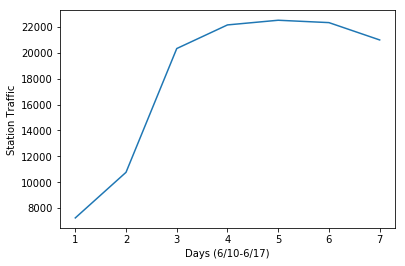

In [244]:
import matplotlib.pyplot as plt
import matplotlib 

x = []
y = []

for i in range(7):
    start_time = dt(2017,6,10+i,0,0,0)
    end_time = dt(2017,6,11+i,0,0,0)
    x.append(start_time)
    y.append(stationRiders(bigDict[('N067', 'R012', '34 ST-PENN STA')],start_time,end_time))

plt.plot([1,2,3,4,5,6,7],y)
plt.xlabel('Days (6/10-6/17)')
plt.ylabel('Station Traffic')
plt.show();



27.Sort by busiest station areas during 6/12 midnight - 6/13 midnight in descending order by creating a list of sorted tuples:

[(278970, ('R238', 'R046', 'GRD CNTRL-42 ST'), 557), (269824, ('PTH22', 'R540', 'PATH NEW WTC'), 448), (191494, ('R249', 'R179', '86 ST'), 571), (184920, ('R240', 'R047', 'GRD CNTRL-42 ST'), 559), (152336, ('H009', 'R235', 'BEDFORD AV'), 118), (149083, ('R533', 'R055', 'FLUSHING-MAIN'), 683), (142597, ('A025', 'R023', '34 ST-HERALD SQ'), 11), (142450, ('R138', 'R293', '34 ST-PENN STA'), 480), (142254, ('N500', 'R020', '47-50 STS ROCK'), 361), (140941, ('N506', 'R022', '34 ST-HERALD SQ'), 368)]


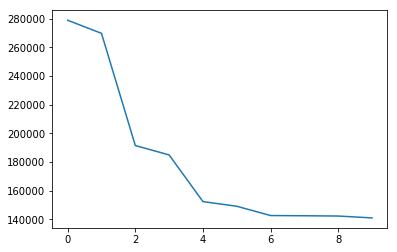

In [225]:
start_time = dt(2017,6,12,0,0,0)
end_time = dt(2017,6,17,0,0,0)

x = []
y = []
y_val = []
i = 0
for ele in bigDict:
    y_val.append((stationRiders(bigDict[ele],start_time,end_time),ele,i))
    i+=1

y_val.sort(reverse=True)
top_ten = y_val[:10]

print(top_ten)
j = 0
for ele in top_ten:
    x.append(j)
    j+=1
    y.append(ele[0])
plt.plot(x,y)
plt.show()

28.Make a dictionary called total_dict that contains the station name as its key and the total number of riders through all of its station areas between 6/12-6/13 as its value. Then create a sorted list of tuples to view the busiest stations on that day.

In [234]:
### This code prints the top ten for each weekday
# end_time = dt(2017,6,13,0,0,0)
key_dict = dict()
for i in range(12,17):
    station_list = []
    for j in range(20):
        start_time = dt(2017,6,i,j,0,0)
        end_time = dt(2017,6,i,j+4,0,0)
        total_dict = dict()
        for key in bigDict:
            station = key[2]
            if station not in total_dict:
                total_dict[station] = stationRiders(bigDict[key],start_time,end_time)
            else:
                total_dict[station] += stationRiders(bigDict[key],start_time,end_time)
        for station, num in total_dict.items():
            station_list.append((num, station, start_time.hour))
    station_list.sort(reverse=True)
    print(station_list[:10])

[(40928, '34 ST-PENN STA', 16), (37677, '34 ST-HERALD SQ', 8), (36186, 'TIMES SQ-42 ST', 8), (35638, '47-50 STS ROCK', 8), (31241, '34 ST-HERALD SQ', 16), (26889, 'GRD CNTRL-42 ST', 8), (25658, '14 ST-UNION SQ', 9), (24753, 'LEXINGTON AV/53', 8), (23712, '34 ST-PENN STA', 8), (23052, '42 ST-PORT AUTH', 16)]
[(43051, '34 ST-PENN STA', 16), (40329, '34 ST-HERALD SQ', 8), (37679, '47-50 STS ROCK', 8), (36515, 'TIMES SQ-42 ST', 8), (31644, '34 ST-HERALD SQ', 16), (25494, 'LEXINGTON AV/53', 8), (25197, '34 ST-PENN STA', 8), (24590, '14 ST-UNION SQ', 9), (23718, '42 ST-PORT AUTH', 16), (23635, '86 ST', 16)]
[(42956, '34 ST-PENN STA', 16), (40317, '34 ST-HERALD SQ', 8), (38638, '47-50 STS ROCK', 8), (37499, 'TIMES SQ-42 ST', 8), (35850, 'GRD CNTRL-42 ST', 8), (32800, '34 ST-HERALD SQ', 16), (28049, '14 ST-UNION SQ', 9), (26244, 'LEXINGTON AV/53', 8), (24724, '34 ST-PENN STA', 8), (23977, '59 ST', 8)]
[(44314, '34 ST-PENN STA', 16), (39550, '34 ST-HERALD SQ', 8), (37672, 'TIMES SQ-42 ST', 8), 

29.Make a histogram of those station totals:

In [ ]:
#insert 29
x = []
y = []
for ele in station_list[:10]:
    x.append(ele[1])
    y.append(ele[0])

plt.show()

30.Create a commuter index to be the average weekday exits divided by the sum of the avg weekday exits + avg weekend exits. To do this, first make a function called isWeekday that returns True if the datetime input is a weekday and False if it isn't.

In [ ]:
#insert 31

31.Make a function called commuterIndex that inputs a (C/A,UNIT,STATION) tuple and outputs its commuter index. 

For example, the output of 
```python
getCommuteIndex(('PTH11', 'R545', '14TH STREET'))
```
should be 0.663.

In [ ]:
#insert 31

32.Create a sorted list of tuples in descending order containing the commuter index and the station area tuple.

In [ ]:
#insert 32

33.Remember that there are still several station areas within each station. Let's get all of the commuter indexes for each station area and then take the median of that commuter index to assign to the entire station. Create a sorted list of tuples in descending order containing the median commuter index and the station name.

In [ ]:
#insert 33

### How can you use what you have done so far to make decisions about MTA advertising???